In [ ]:



# Hands-On Machine Learning with Scikit-Learn & TensorFlow
# Chapter-03 - Classification
# 15-March-2020



#-----------------------------------------------Notes------------------------------------------------------------------#
# MNIST Data-set : A set of 70K small images of digits handwritten by high school students and employees of the US census Beaureu.
# This set is like "Hello World" of Machine Learning.
# In IIITH the first classification model is I have built on is MNIST dataset
#----------------------------------------------------------------------------------------------------------------------#

# utilities
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [26]:
y[1:100]

array(['0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3', '6',
       '1', '7', '2', '8', '6', '9', '4', '0', '9', '1', '1', '2', '4',
       '3', '2', '7', '3', '8', '6', '9', '0', '5', '6', '0', '7', '6',
       '1', '8', '7', '9', '3', '9', '8', '5', '9', '3', '3', '0', '7',
       '4', '9', '8', '0', '9', '4', '1', '4', '4', '6', '0', '4', '5',
       '6', '1', '0', '0', '1', '7', '1', '6', '3', '0', '2', '1', '1',
       '7', '9', '0', '2', '6', '7', '8', '3', '9', '0', '4', '6', '7',
       '4', '6', '8', '0', '7', '8', '3', '1'], dtype=object)

In [2]:

#-----------------------------------------------Code------------------------------------------------------------------#
# Download MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)


X,y = mnist

print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  47. 160. 195. 205.
   71.  86.  13.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  12. 238. 254. 254. 254.
  254. 254. 227.  84.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  13. 196. 176. 127. 176.
  207. 236. 245. 222.  23.   0.   0.   0.   0.   0.   0.  

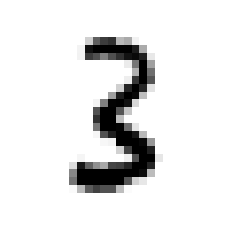

In [3]:

# Display the image
import matplotlib
import matplotlib.pyplot as plt

digit = X[50000]
digit_image = digit.reshape(28, 28)
print(digit_image)

plt.imshow(digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

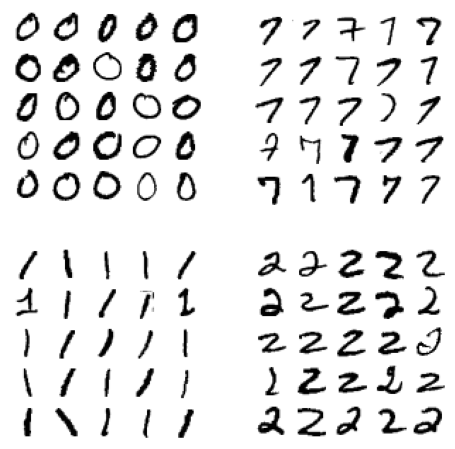

In [23]:

#cl_a, cl_b = '8','9'  # 3,5 4,9
#y_preds_temp = y_preds_rf   #y_preds_sgd
X_aa = X[ (y == '0') ]
X_ab = X[ (y == '7') ]
X_ba = X[ (y == '1') ]
X_bb = X[ (y == '2') ]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)




In [5]:




# Create a training and testing Set
number_training_itmes = 10000
train_set, train_label, test_set, test_label = X[:number_training_itmes], y[:number_training_itmes], \
                                               X[number_training_itmes:], y[number_training_itmes:]

# Shuffling the order of training data, as some learning algorithms are sensitive to the order of the training instances.
# And the perform poorly if they get many similar instances in a row. (data set similar to Timeseries data could be exception here)

import numpy as np
shuffle_index = np.random.permutation(number_training_itmes)
train_set, train_label = train_set[shuffle_index], train_label[shuffle_index]

elements, counts = np.unique(train_label, return_counts=True)
props = 100*counts/counts.sum()
print(props)
elements, counts = np.unique(test_label, return_counts=True)
props = 100*counts/counts.sum()
print(props)

# Train a binary classifier
# Since there are total 10 (digits) classes to classify, lets start with two for now

y_train_5 = (train_label =='5')  #Now we have two classes, Class 'True' if digit =5 else class 'False'
y_test_5 = (test_label =='5')

# Train a SGDClassifier (a Stochastic Gradient Descent Classifier), an online learning

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=10)  #relies on randomness during training
sgd_clf.fit(train_set, y_train_5)

sgd_clf.predict([digit])



[10.01 11.27  9.91 10.32  9.8   8.63 10.14 10.7   9.44  9.78]
[ 9.83666667 11.25        9.99833333 10.18166667  9.74        9.08333333
  9.77       10.37166667  9.80166667  9.96666667]


array([False])

In [6]:


#Performance Measure

#Measuring Accuracy using Cross-Validation

from sklearn.model_selection import StratifiedKFold
#from sklearn.base import Clone

skfolds = StratifiedKFold(n_splits=4, random_state=10, shuffle=True) # Does a very basic stuff, we even can implement it by ourself

for train_index, test_index in skfolds.split(train_set, y_train_5):
    print(train_index[0:10])
    print(test_index[0:10])

    sgd_clf = SGDClassifier(random_state=10) # Every time instantiate a new object

    sgd_clf.fit(train_set[ train_index], y_train_5[train_index])
    y_pred = sgd_clf.predict(train_set[test_index])
    n_match = sum(y_train_5[test_index] == y_pred)
    print(n_match/len(y_pred))


[ 0  1  2  3  4  5  6 14 15 17]
[ 7  8  9 10 11 12 13 16 18 20]
0.9588
[ 0  1  4  6  7  8  9 10 11 12]
[ 2  3  5 15 17 19 22 23 30 34]
0.9648
[ 1  2  3  4  5  7  8  9 10 11]
[ 0  6 25 27 28 31 37 38 39 45]
0.9588
[ 0  2  3  5  6  7  8  9 10 11]
[ 1  4 14 24 42 47 52 53 59 64]
0.964


In [9]:

# ~95% Accuracy ah. This looks amazing its wait.

# Lets create a baseline accuracy, if you build a really dumb classifier
# In this case, just assign every digit to 'not 5' digit class. what would be accuracy?

from sklearn.model_selection import cross_val_score  # Instead of writing that much code, python has done the job
from sklearn.base import BaseEstimator
class BaselineClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

base_model = BaselineClassifier()
cross_val_score(base_model, train_set, y_train_5, cv=4, scoring='accuracy')

# Around 90% accuracy with really dumb classifier aah, because only 10% are digit '5' class, and rest 90% are 'not 5'.
# Now 95% doesn't seem very good isn't it?

# This is why accuracy is generally not preferred performance measure for classifiers, especially when you are dealing
# with skewed datasets.


array([0.9204, 0.9132, 0.9128, 0.9084])

In [10]:

#Confusion Matrix
from sklearn.model_selection import cross_val_predict
# Instead of returning the evaluation scores ie accuracy, 'cross_val_predict' returns the prediction made on each test fold

y_train_pred = cross_val_predict(sgd_clf, train_set, y_train_5, cv=4)

from sklearn.metrics import confusion_matrix
conf_matr = confusion_matrix(y_train_5, y_train_pred)

#Confustion Metrics, Understand
#            Predictions
#             -ve   +ve
#actual  -ve | TN   FP |
#actual  +ve | FN   TP |

# How does a confusion matrix looks like for a perfect classifier
confusion_matrix(y_train_5, y_train_5)

# Precision : What proportion of predicted positive instances are predicted correct?
# For an example : For a disease test, what times the test was correct when test came out positive?
# = TP/ (TP+FP)   = TP/(# positive predicted cases)

Precision = conf_matr[1,1]  / (conf_matr[1,1] + conf_matr[0,1])
print(Precision)


# Recall : What proportion of actual positive instances are predicted correct?
# For an example : For a disease test, what times the test has detected the positive cases?
# = TP/ (TP+FN)   = TP/(# positive cases)
Recall = conf_matr[1,1]  / (conf_matr[1,1] + conf_matr[1,0])
print(Recall)


0.7289504036908881
0.7323290845886443


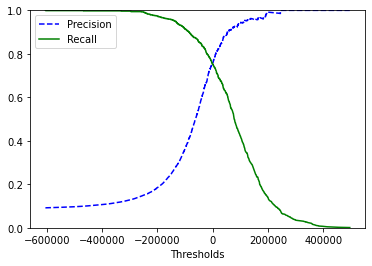

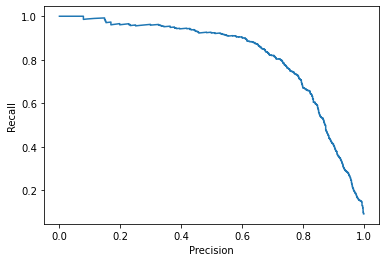

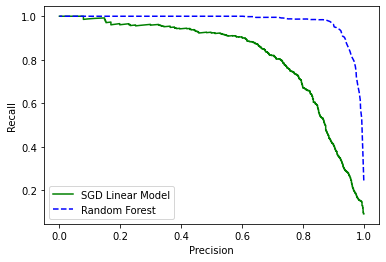

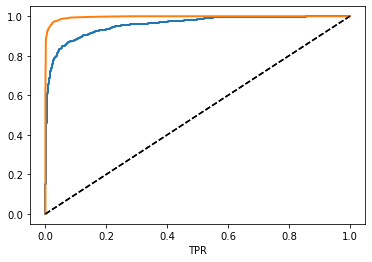

0.9583148546948086
0.996770544832485


SGDClassifier(random_state=10)

In [11]:

# It always a desire to get higher precsion and higher recall.
# Unfortunately, you cant have it both ways,
    # increasing precision reduces recall and vice versa. This is called precision and recall tradeoff.
# Either high recall or high precision based on the problem you are trying to solve.
# For an example,
    #1. If you trained a classifer to detect videos that are safe for kids, you do not want to have false positives here.
    # hence high precision and you would be okay with high false negatives (rejects good videos) and hence low recall.
    #2. If you have trained a classifier to detect a disease, you would be okay with False positives (false alerts) but
    # do not want any pateinet with a disease to go undetected (ie low false negatives) hence high recall but low precision.

# Precision / Recall Tradeoff ----- PR Curve

# predict fundtion returns classes, 'decision_function' retuns score
y_scores = cross_val_predict(sgd_clf, train_set, y_train_5, cv=3, method="decision_function")

# given a range of scores, we can find presion and recall for all possible score thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_prec_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = 'Precision')
    plt.plot(thresholds, recalls[:-1], "g-", label = 'Recall')
    plt.xlabel("Thresholds")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

# Now select a threshold, at which you are looking for a precsion or recall.
plot_prec_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# PR Curve
# Draw a plot x axis precision and y recall
plt.plot(recalls, precisions)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

# running random forest instead of SGD classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, train_set, y_train_5, cv=3, method = 'predict_proba')
y_probas_forest2 = y_probas_forest[:,1] # Class 2 probability
rf_precisions, rf_recalls, rf_thresholds = precision_recall_curve(y_train_5, y_probas_forest2)



# As you see in the plot for PR Curve, clearly Random Forest is doing better
plt.plot(recalls, precisions,'g-', label = 'SGD Linear Model')
plt.plot(rf_recalls, rf_precisions, 'b--', label = 'Random Forest')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc="lower left")
plt.show()

# ROC Curve (Reciever Operationg curve)
# Y Axis : TPR (Recall/Sensitivity), X Axis : FPR  = (1-TNR) = (1-Specificity)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_train_5, y_probas_forest2)


def plot_roc_curve(tpr, fpr):
    plt.plot(fpr, tpr, linewidth = 2, label = None)
    plt.plot([0,1], [0,1], "k--", label = 'Recall')
    plt.xlabel("FPR")
    plt.xlabel("TPR")

plot_roc_curve(tpr,fpr)
plot_roc_curve(rf_tpr,rf_fpr)
plt.show()
# The digonal dotted line represent purely random classifier
# AUC : A perfect classifier have AUC=1, while a random classifier have AUC = 0.5

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))
print(roc_auc_score(y_train_5, y_probas_forest2))

#When to Use ROC vs. Precision-Recall Curves?
##Generally, the use of ROC curves and precision-recall curves are as follows:
## --> ROC curves should be used when there are roughly equal numbers of observations for each class.
## --> Precision-Recall curves should be used when there is a moderate to large class imbalance.
##The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance.
##Some go further and suggest that using a ROC curve with an imbalanced dataset might be deceptive and lead to incorrect
 # interpretations of the model skill.
## If the proportion of positive to negative instances changes in a test set, the ROC curves will not change. Metrics
 # such as accuracy, precision, lift and F scores use values from both columns of the confusion matrix. As a class distribution changes these measures will change as well, even if the fundamental classifier performance does not. ROC graphs are based upon TP rate and FP rate, in which each dimension is a strict columnar ratio, so do not depend on class distributions.


# Multiple Class Classification (More Than 2 Classes)
 # Some Algorithms ie Random Forest, Naive Bayes are capable of handling multiple classes directly
 # Others such as SVM or Linear Classifiers are strictly binary classifiers. Though we can various stratagies that one
 ## can use to perform multiclass classification using multiple binary classifiers which are
 ### One-Versus-All (OvA) : like we did before we can create a single binary classifiers each for  class '1' vs 'not 1',
 ### class '2' vs 'not 2' and so on and hence total 10 classifiers.
 ## and One-Versus-One : A binary classifier for every pair of digits and hence 10*(10-1) binary classifiers.

 ## When to use OvA or OvO?  Some algorithms such as SVM scale poorly with the size of training set, so for these type
 ## of algorithms OvO is preferred
 ## ALthough for most binary classification algos OvA is preferred.

 # Scikit learn automatically detects when you try to use a binary classifier for a multi class classification task, and
 # it auromatically runs OvA (except for SVM where it uses OvO).

sgd_clf.fit(train_set, train_label) # Under the hood it  trained 10 classifiers


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  41. 239. 253. 253. 253. 174.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 175. 251. 251. 251. 251. 173.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  82. 228. 251. 251. 251. 251. 173.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

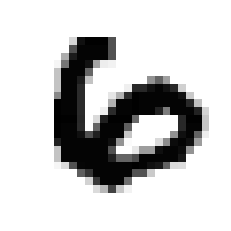

Predicted class,  6


In [24]:


digit = X[9000]
digit_image = digit.reshape(28, 28)
print(digit_image)

plt.imshow(digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

sgd_clf.predict([digit]) # Give away the prediction
sgd_clf.decision_function([digit]) # 10 scores for every class. Highest score corresponding to the digit

print("Predicted class, ",np.argmax(sgd_clf.decision_function([digit]))) # returns the argument for which value of the function is highest

#print(sgd_clf.classes_) # Prints all classes, only availble in case of multi-class



In [17]:

# If you want to force Scikit learn to use OvA or OvO
from sklearn.multiclass import OneVsOneClassifier
ovo_clf  = OneVsOneClassifier(SGDClassifier(random_state=10))
ovo_clf.fit(train_set, train_label)
ovo_clf.predict([digit])
print(len(ovo_clf.estimators_)) # Number of binary classifiers

# The random classifier is as easy.
forest_clf.fit(train_set, train_label)
forest_clf.predict([digit])

# How to confusion matrix look for multiclass predictions
y_preds_sgd = sgd_clf.predict(test_set)
y_preds_sgd_OvO = ovo_clf.predict(test_set)
y_preds_rf = forest_clf.predict(test_set)

print(confusion_matrix(test_label, y_preds_sgd))
print(confusion_matrix(test_label, y_preds_sgd_OvO))
print(confusion_matrix(test_label, y_preds_rf))

from sklearn.metrics import accuracy_score

# With a random classifier, expected accuracy would be 10%, so getting 95% accuracy with rf is a awesome job
print(accuracy_score(test_label, y_preds_sgd))      # 3rd best  86%
print(accuracy_score(test_label, y_preds_sgd_OvO))  # 2nd best 90%
print(accuracy_score(test_label, y_preds_rf))       # 1st best 95%


45
[[5714    0   43   17    5   12   51   11   41    8]
 [  17 6279  147   24    8   15   21   13  181   45]
 [  54   38 5262  162   56   16  137   71  166   37]
 [  55   10  164 5364    9  140   55   53  116  143]
 [  34   18   45   43 4848   24   70   40  144  578]
 [ 177   12   57  460   61 3934  242   20  330  157]
 [  78   14   85    8   31   42 5522    6   69    7]
 [  43   12  123   71   56   15    9 5257   51  586]
 [  81  114  104  292   51  144   59   31 4688  317]
 [  52   23   33  118  161   34    3  152   55 5349]]
[[5669    0   46   11    7   50   67    7   32   13]
 [   4 6519   32   25    5   25   10   14  112    4]
 [  48   22 5224  129   85   39  103   67  252   30]
 [  28   16  110 5454    5  170   26   46  198   56]
 [   9   18   32    1 5462    7   50   43   32  190]
 [ 108   12   46  325   48 4477  114   11  264   45]
 [  38   11   58    4   59   83 5561    8   39    1]
 [  14   23   69   57   58    6    2 5724   31  239]
 [  28   55   39  155   27  176   32   28 

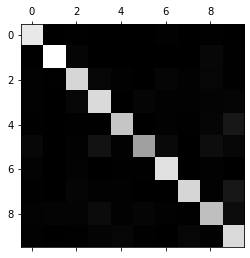

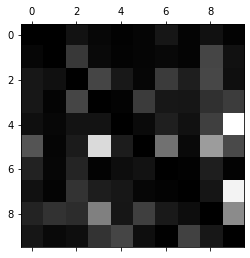

In [18]:


# Error Analysis
## Lets analyze the confusion matrix, lot of number huh, just convert it to a image repr
conf_matr = confusion_matrix(test_label, y_preds_sgd)
plt.matshow(conf_matr, cmap=plt.cm.gray)
plt.show()

# observations
## Looks fairly good, since most images are on the main digonal, means classified correcly
## 5s and 3s look slightly darker than the other digits, means classifier does not perform well on these

# Lets compare error rate instead
row_sums = conf_matr.sum(axis=1, keepdims = True) # summing rows/actual classes
conf_matr_norm = conf_matr/row_sums
np.fill_diagonal(conf_matr_norm,0)
plt.matshow(conf_matr_norm, cmap=plt.cm.gray)
plt.show()


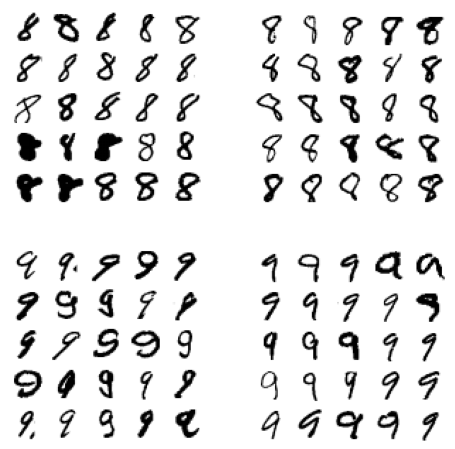

In [19]:

# Observations for above plot
## 1. The columns for 8 and 9 are quite bright , which tells that many images get wronlgy predicted (missclassified)
    # as 8s and 9s.
## 2. Rows are for 8 and 9 are also quite bright, which suggests that 8s and 9s are often confused with other digits.
## 3. The 3s and 5s are confused with each other.
## 4. columns and rows for 0,1,2 are quite dark, means they are getting classified with ease.

# Analyzing the confusion matrix can often give you insights on ways to improve the classifiers.

# Analyzing individual errors is also a good idea to gain insights on what your classifier is doing and
# why it is failing, but it is more difficult and more confusing.
# For example, lets plot examples of 3s and 5s.

cl_a, cl_b = '8','9'  # 3,5 4,9
y_preds_temp = y_preds_rf   #y_preds_sgd
X_aa = test_set[ (test_label == cl_a) & (y_preds_temp == cl_a)]
X_ab = test_set[ (test_label == cl_a) & (y_preds_temp == cl_b)]
X_ba = test_set[ (test_label == cl_b) & (y_preds_temp == cl_a)]
X_bb = test_set[ (test_label == cl_b) & (y_preds_temp == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)



# Mutilable Classifcation
# Multioutput Classification
# Excercise

